<h1 align=center>Trabalhando com dados não rotulados – Análise de cluster</h1>
<p align=center><img src=https://miro.medium.com/max/845/1*rFATWK6tWBrDJ1o1rzEZ8w.png></p>

Conhecemos algumas técnicas de aprendizado supervisionado para construir modelos de aprendizado de máquina, usando dados onde a resposta já era conhecida – os rótulos de classe já estavam disponíveis em nossos dados de treinamento. Agora, vamos mudar de marcha e explorar a **análise de cluster**, uma categoria de técnicas de *aprendizado não supervisionado* que nos permite descobrir estruturas ocultas em dados onde não sabemos a resposta certa antecipadamente. O objetivo do agrupamento é encontrar um agrupamento natural nos dados, de modo que os itens do mesmo agrupamento sejam mais semelhantes entre si do que os de agrupamentos diferentes.

### Agrupando objetos por similaridade usando *k-means*
Aprenderemos sobre um dos algoritmos de agrupamento mais populares, o *k-means*, que é amplamente utilizado na academia e na indústria. *Clustering* (ou análise de cluster) é uma técnica que nos permite encontrar grupos de objetos semelhantes que estão mais relacionados entre si do que com objetos de outros grupos. Exemplos de aplicativos de *clustering* orientados a negócios incluem o agrupamento de documentos, músicas e filmes por tópicos diferentes ou encontrar clientes que compartilhem interesses semelhantes com base em comportamentos de compra comuns como base para mecanismos de recomendação.

### Agrupamento *K-means* usando *scikit-learn*

Como você verá em um momento, o algoritmo *k-means* é extremamente fácil de implementar, mas também é **computacionalmente muito eficiente** em comparação com outros algoritmos de agrupamento, o que pode explicar sua popularidade. O algoritmo *k-means* pertence à categoria de agrupamento baseado em protótipo. Discutiremos duas outras categorias de agrupamento, **agrupamento hierárquico** e o **agrupamento baseado em densidade**.

Agrupamento baseado em protótipo significa que cada cluster é representado por um protótipo, que geralmente é o **centroide** (*média*) de pontos semelhantes com características contínuas, ou o **medoide** (o mais representativo ou o ponto que minimiza a distância a todos os outros pontos que pertencem para um determinado cluster) no caso de características categóricas. Embora o *k-means* seja muito bom para identificar *clusters* com formato esférico, uma das desvantagens desse algoritmo de agrupamento é que temos que especificar o número de *clusters*, $\small k$, a priori. Uma escolha inadequada para $\small k$ pode resultar em baixo desempenho de agrupamento. Mais adiante, discutiremos o **método do cotovelo** e os **gráficos de silhueta**, que são técnicas úteis para avaliar a qualidade de um agrupamento para nos ajudar a determinar o número ideal de agrupamentos, $\small k$.

Embora o clustering *k-means* possa ser aplicado a dados em dimensões mais altas, veremos os exemplos a seguir usando um conjunto de dados bidimensional simples para fins de visualização:

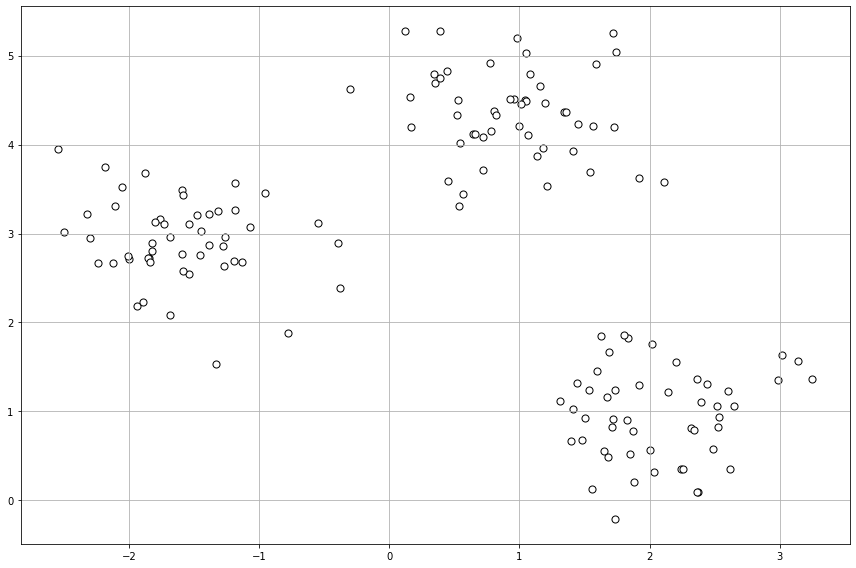

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], 
            c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()

plt.show()

O conjunto de dados que acabamos de criar consiste em 150 pontos gerados aleatoriamente que são agrupados aproximadamente em três regiões com maior densidade, que são visualizadas por meio de um gráfico de dispersão bidimensional.

Em aplicações de agrupamento do mundo real, não temos nenhuma informação de categoria de verdade básica (informações fornecidas como evidência empírica em oposição a inferência) sobre esses exemplos; se nos dessem rótulos de classe, essa tarefa se enquadraria na categoria de **aprendizado supervisionado**. Assim, nosso objetivo é agrupar os exemplos com base em suas semelhanças de recursos, o que pode ser alcançado usando o algoritmo *k-means*, resumido pelas quatro etapas a seguir:
1. Escolha aleatoriamente $\small k$ centroides dos exemplos como centros iniciais do *cluster*.
2. Atribua cada exemplo ao centróide mais próximo, $\small \mu^{j},j \in \{1,\cdots, k\}$.
3. Mova os centroides para o centro dos exemplos que lhe foram atribuídos.
4. Repita as etapas 2 e 3 até que as atribuições de *cluster* não sejam alteradas ou uma tolerância definida pelo usuário ou número máximo de iterações seja atingido.

Agora, a próxima pergunta é: como medimos a similaridade entre objetos? Podemos definir similaridade como o oposto de distância, e uma distância comumente usada para agrupar exemplos com feições contínuas é a **distância euclidiana quadrada** entre dois pontos, $\small x$ e $\small y$, no espaço $\small m$-dimensional:
$$
d(x,y)^{2} = \sum^{m}_{j=1}(x_{j} - y_ {j})^2 = \left \|x - y \right \|^{2}_{2}
$$

Observe que, na equação anterior, o índice $\small j$ se refere à $\small j$ nésima dimensão (coluna de recurso) das entradas de exemplo, $\small x$ e $\small y$. Usaremos os sobrescritos $\small i$ e $\small j$ para nos referirmos ao índice do exemplo (registro de dados) e ao índice do *cluster*, respectivamente.

Agora que você aprendeu como o algoritmo *k-means* simples funciona, vamos aplicá-lo ao nosso conjunto de dados de exemplo usando a classe `KMeans` do módulo `cluster` do *scikit-learn*:

In [4]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,     # Definindo o número de cluster desejado.
            init = 'random',  # Inicia aleatoriamente.
            n_init=10,        # Executa o kmeans 10 vezes indepentendemente, com diferentes centroides para o escolher o modelo final com menor erro.
            max_iter=300,     # Número máximo de iterações para cada execução. Pode ser computacionalmente custoso em grandes interações.
            tol = 1e-04,      # Problemas de convergência. Utiliza valores grandes para a Tolerância em relação ao erro. 
            random_state=0)   

y_km = km.fit_predict(X)

Um problema com *k-means* é que um ou mais *clusters* podem estar vazios. Observe que esse problema não existe para *k-medoids* ou *fuzzy C-means*, um algoritmo que discutiremos mais adiante.

No entanto, esse problema é considerado na implementação atual do *k-means* no *scikit-learn*. Se um *cluster* estiver vazio, o algoritmo procurará o exemplo mais distante do centroide do *cluster* vazio. Em seguida, ele reatribuirá o centroide para ser este ponto mais distante.

> #### Dimensionamento de recursos
> Quando estamos aplicando *k-means* a dados do mundo real usando uma métrica de distância euclidiana, queremos ter certeza de que os recursos são medidos na > mesma escala e aplicar a padronização de *z-score* ou escala *min-max*, se necessário.

Tendo previsto os rótulos de *cluster*, $\small y\_km$, e discutido alguns dos desafios do algoritmo *k-means*, vamos agora visualizar os *clusters* que o *k-means* identificou no conjunto de dados junto com os centróides do *cluster*. Eles são armazenados no atributo `cluster_centers_` do objeto `KMeans` ajustado:

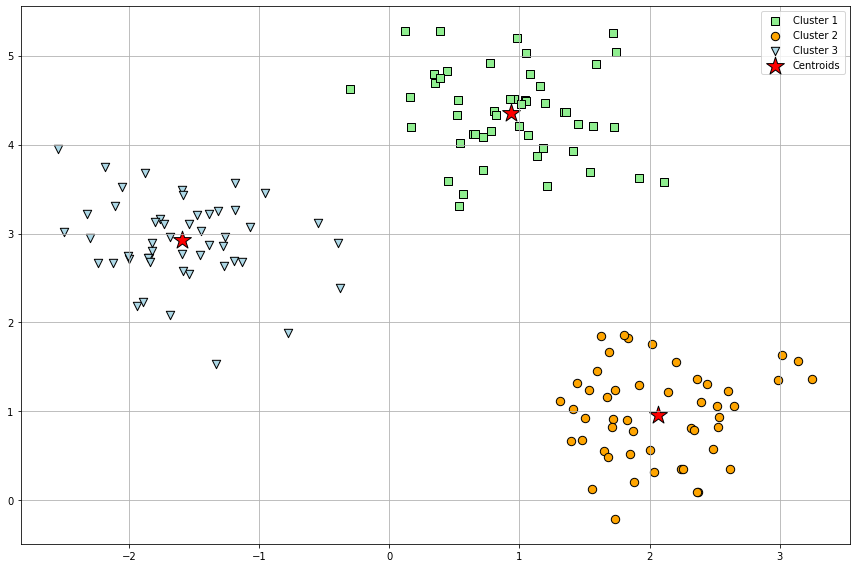

In [6]:
plt.figure(figsize=(12,8))
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=70, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=70, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=70, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=350, marker='*',
            c='red', edgecolor='black',
            label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

Embora o *k-means* tenha funcionado bem neste conjunto de dados de fictício, vamos destacar outra desvantagem do *k-means*: temos que especificar o número de *clusters*, $\small k$, *a priori*. O número de *clusters* a serem escolhidos nem sempre é tão óbvio em aplicativos do mundo real, especialmente, se estivermos trabalhando com um conjunto de dados de **dimensão mais alta** que não pode ser visualizado. As outras propriedades do *k-means* são que os *clusters* não se sobrepõem e não são hierárquicos, e também assumimos que há pelo menos um item em cada *cluster*.

Encontraremos diferentes tipos de algoritmos de agrupamento, **agrupamento hierárquico** e **agrupamento baseado em densidade**. Nenhum tipo de algoritmo exige que especifiquemos o número de *clusters* antecipadamente ou assumamos estruturas esféricas em nosso conjunto de dados. 

Agora, abordaremos uma variante popular do algoritmo *k-means* clássico chamado ***k-means++***. Embora não aborde essas suposições e desvantagens de *k-means* que foram discutidas no parágrafo anterior, ele pode melhorar muito os resultados de agrupamento por meio de uma propagação mais inteligente dos centros de agrupamento iniciais.